In [1]:
from gaspy.tasks.db_managers import catalog
from pymatgen import MPRester
from gaspy.utils import read_rc
from gaspy.tasks.core import schedule_tasks, get_task_output
from ast import literal_eval
matproj_api_key = 'B7pkHxCQtALPzGRy'


successfully loaded your custom FW_config.yaml!


In [2]:
import pandas as pd

df = pd.read_csv("/global/project/projectdirs/m2755/sback/materials-project/02_filter/pourbaix_stable.csv", index_col=0, converters={"symbols": literal_eval})
del df['atoms']
df

,mpid,numbers,symbols,acid_stability,neut_stability,base_stability
0,mp-1226103,2,"{Co, B}",1.19,0.78,1.12
34,mp-1186013,2,"{Pd, Mn}",0.71,0.52,0.48
35,mp-1080603,2,"{Co, Fe}",1.49,0.92,1.12
53,mp-7818,2,"{Pd, Se}",0.09,0.09,0.17
55,mp-569776,2,"{Ta, Ni}",1.54,0.93,0.89
79,mp-21657,2,"{Se, Tl}",0.58,0.38,0.46
101,mp-1226736,2,"{Ag, Cd}",0.70,0.35,0.24
161,mp-1225656,2,"{Pd, Cu}",0.77,0.38,0.39
207,mp-1115,2,"{Se, Pt}",0.13,0.13,0.38
208,mp-1103235,2,"{Te, Cu}",1.31,0.84,1.26


In [4]:
# from ase.io import read
# from ase.data import covalent_radii as CR
# import sys

# from datetime import datetime
# import numpy as np

# def get_coordination_numbers(atoms, covalent_percent=1.3):
#     """Returns an array of coordination numbers and an array of existing bonds determined by
#     distance and covalent radii.  By default a bond is defined as 120% of the combined radii
#     or less. This can be changed by setting 'covalent_percent' to a float representing a 
#     factor to multiple by (default = 1.2).
#     If 'exclude' is set to an array,  these atomic numbers with be unable to form bonds.
#     This only excludes them from being counted from other atoms,  the coordination
#     numbers for these atoms will still be calculated,  but will be unable to form
#     bonds to other excluded atomic numbers.
#     """

#     # Get all the distances
#     distances = np.divide(atoms.get_all_distances(mic=True), covalent_percent)
    
#     # Atomic Numbers
#     numbers = atoms.numbers
    
#     # Coordination Numbers for each atom
#     cn = []
#     cr = np.take(CR, numbers)
#     # Array of indices of bonded atoms.  len(bonded[x]) == cn[x]
#     bonded = []
#     indices = list(range(len(atoms)))
#     for i in indices:
#         bondedi = []
#         for ii in indices:
#             # Skip if measuring the same atom
#             if i == ii:
#                 continue
#             if (cr[i] + cr[ii]) >= distances[i,ii]:
#                 bondedi.append(ii)
#         # Add this atoms bonds to the bonded list
#         bonded.append(bondedi)
#     for i in bonded:
#         cn.append(len(i))
        
#     # Atom specie
#     symbols = []
#     for i in atoms:
#         symbols.append(i.symbol)
        
#     return symbols, cn#, bonded


# Test for DFT calculated results

In [3]:
# import os
# from ase.io import read, write
# from pymatgen.io.ase import AseAtomsAdaptor

# dft_path = "/global/homes/s/sback/m2755/sback/materials-project/my_dft_bulk/"
# ase_atoms = []
# pymatgen_structures = []
# name = []


# for i in os.listdir(dft_path):
#     if i!='summary':
#         name.append(i)
#         atoms = read(dft_path+str(i)+'/CONTCAR')
#         ase_atoms.append(atoms)
#         pymatgen_structures.append(AseAtomsAdaptor.get_structure(atoms))
    
# cn_covalent = []
# for i in ase_atoms:
#     cn_covalent.append(get_coordination_numbers(i))
    


In [19]:
# for i,j in zip(name, ase_atoms):
#     write(dft_path+"/summary/"+str(i)+".cif", j)

In [4]:
# active_atom = ['In', 'Pb', 'Pt', 'Te', 'Cd', 'Pd', 'Ag']



In [210]:
# from pymatgen.analysis.local_env import CrystalNN

# CrystalNN = CrystalNN(distance_cutoffs=None, x_diff_weight=0.0, porous_adjustment=False)
# cn_pymatgen = []

# for pymatgen_structure in pymatgen_structures:
#     active_atoms = []
#     cn = []
#     active_atom_symbols = []
#     for i,j in enumerate(pymatgen_structure):
#         if str(j.specie) in active_atom:
#             active_atoms.append(i)
#     for i in active_atoms:
#         cn.append(CrystalNN.get_cn_dict(pymatgen_structure, i))
#         active_atom_symbols.append(str(pymatgen_structure[i].specie))
#     cn_pymatgen.append([active_atoms, cn, active_atom_symbols])
        


In [213]:
# df_dft = pd.DataFrame()
# df_dft['name'] = name
# df_dft['active_atom_index'] = [i[0] for i in cn_pymatgen]
# df_dft['active_atom_symbol'] = [i[2] for i in cn_pymatgen]
# df_dft['cn'] = [i[1] for i in cn_pymatgen]



# Collect structures

In [5]:
mpids = [i for i in df['mpid']]

In [6]:
def get_structures_mpid(mpid):
    with MPRester(matproj_api_key) as m:
        st = m.get_structure_by_material_id(material_id=mpid, final=True)
        natoms = len(st) # number of sites of bulk structures
    return st, natoms



In [7]:
from joblib import Memory
import multiprocess as mp
from tqdm.notebook import tqdm

memory = Memory('./cached_structures', verbose=0)
cached_str = memory.cache(get_structures_mpid)

# Add fingerprints    
with mp.Pool(32) as pool:
    structures = list(tqdm(pool.imap(cached_str, mpids), total=len(mpids)))

# add natoms in df
df['natoms'] = [i[1] for i in structures]

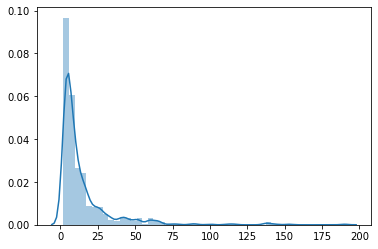

In [9]:
import seaborn as sns
sns.distplot([i[1] for i in structures])

# Find structures that contain "inactive atoms"

633 230


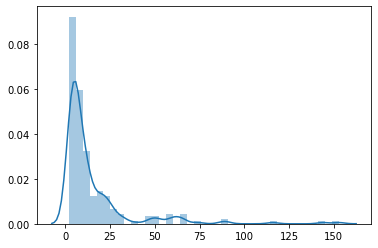

In [25]:
inert = ['Au','S','Tl','Se','Hg','Ag']
mask = []

for index, row in df.iterrows():
    symbols = list(row['symbols'])
    sym0 = symbols[0]
    sym1 = symbols[1]
    if sym0 in inert or sym1 in inert:
        mask.append(True)
    else:
        mask.append(False)
        
print(len(df), len(df[mask]))

updated_df = df[mask]
natoms = [i for i in updated_df['natoms']]
sns.distplot(natoms)

In [21]:
inert = ['Br','C','Cl','F','I','O','N']
mask = []

for index, row in df.iterrows():
    symbols = list(row['symbols'])
    sym0 = symbols[0]
    sym1 = symbols[1]
    if sym0 in inert or sym1 in inert:
        mask.append(True)
    else:
        mask.append(False)
        
len(df), len(df[mask])

(633, 1)

In [15]:
# This is for NiN only
print(df[mask])
updated_df = df[mask]

         mpid  numbers  symbols  acid_stability  neut_stability  \
3487  mp-2033        2  {N, Ni}            1.17            0.75   

      base_stability  natoms  
3487            0.69       8  


# Only use bulk structures with the number of atoms less than 30

In [26]:
#pd.set_option('display.max_rows', 500)


mask1 = updated_df['natoms'] <= 30
mask2 = updated_df['natoms'] > 30

less_df = updated_df[mask1]
more_df = updated_df[mask2]

len(less_df), len(more_df)

(205, 25)

# Find coordination numbers (is it necessary?) (now move onto surfaces?) (because bulk coordination numbers are hard to evaluate)

In [266]:
# from pymatgen.analysis.local_env import CrystalNN

# CNN = CrystalNN(distance_cutoffs=None, x_diff_weight=0.0, porous_adjustment=False)

# cn_summary = []

# for z,structure in enumerate(structures):
#     index=[]
#     elem=[]
#     cn=[]
#     for i,j in enumerate(structure):
#         symbols = [str(k) for k in set(structure.species)] # What elements does it have?
#         sym1 = str(j.specie)
#         sym2 = list(set(symbols) - set([sym1]))[0]
#         cn_dict = CNN.get_cn_dict(structure=structure, n=i) # coordination dictionary of certain element

#         if len(cn_dict.keys()) == 2: # coord dict has two different elements
#             if cn_dict[sym2] >= 6: # if coordinated with different atoms more than 4 inclusively
#                 cn.append(cn_dict)
#                 index.append(i)
#                 elem.append(str(j.specie))

#         elif len(cn_dict.keys()) == 1 and sym2 in [i for i in cn_dict.keys()] : # only one coordinating element
#                 if cn_dict[sym2] >=6: # if coordinated with different atoms more than 4 inclusively
#                     cn.append(cn_dict)
#                     index.append(i)
#                     elem.append(str(j.specie))
#     cn_summary.append(len(cn))
#     print(z, len(cn))

# Enumerate slabs

In [27]:
from gaspy.defaults import slab_settings
from gaspy.atoms_operators import (make_slabs_from_bulk_atoms,
                               tile_atoms,
                               orient_atoms_upwards,
                               constrain_slab,
                               is_structure_invertible,
                               flip_atoms,
                               tile_atoms,
                               find_adsorption_sites,
                               add_adsorbate_onto_slab,
                               remove_adsorbate,
                               __get_coordination_string)
from pymatgen.io.ase import AseAtomsAdaptor

In [28]:
# This is to generate all possible surfaces from OQMD dataset
def get_surface_docs_from_mpid(mpid):
    millers = [[1,0,0], [0,1,0], [0,0,1], [1,1,0], [0,1,1], [1,0,1], [1,1,1]]
    all_docs = []    
    pymatgen_structure = get_structures_mpid(mpid)
    bulk_atoms = AseAtomsAdaptor.get_atoms(pymatgen_structure[0])
    

    # Taken from GASpy
    # 1. Generate slabs
    for miller in millers:
        slab_structures = make_slabs_from_bulk_atoms(atoms = bulk_atoms, 
                                                    miller_indices = miller,
                                                    slab_generator_settings = slab_settings()['slab_generator_settings'], 
                                                    get_slab_settings = slab_settings()['get_slab_settings'])
        docs = []
        
        for struct in slab_structures:
            atoms = AseAtomsAdaptor.get_atoms(struct)
            atoms = orient_atoms_upwards(atoms)
            slab_atoms_tiled, slab_repeat = tile_atoms(atoms=atoms, min_x=4.5, min_y=4.5) # defalts setting from gaspy
            atoms = slab_atoms_tiled
            doc = {}
            doc['miller'] = miller
            doc['structure'] = AseAtomsAdaptor.get_structure(atoms) # pymatgen format
            doc['top'] = True
            doc['shift'] = struct.shift
            doc['mpid'] = mpid
            docs.append(doc)

            # Invert it if possible
            if is_structure_invertible(struct) is False:
                doc = {}
                doc['miller'] = miller
                atoms_flipped = flip_atoms(atoms)
                structure = AseAtomsAdaptor.get_structure(atoms_flipped)
                doc['structure'] = structure
                doc['top'] = False
                doc['shift'] = struct.shift
                doc['mpid'] = mpid
                docs.append(doc)
        all_docs.extend(docs)    
    return all_docs

In [29]:
#test
mpids = [i for i in less_df['mpid']]
all_docs = get_surface_docs_from_mpid(mpids[1])
len(all_docs)

In [95]:
memory = Memory('./cached_docs', verbose=0)
docs_cached = memory.cache(get_surface_docs_from_mpid)


with mp.Pool(32) as pool:
       all_docs = list(tqdm(pool.imap(docs_cached, mpids), total=len(mpids)))
        

In [96]:
all_docs_extended = []
for i in all_docs:
    for j in i:
        all_docs_extended.append(j)
        
len(all_docs_extended)

6344

In [97]:
import pickle
# Save processed data
with open('all_docs_extended.pkl', 'wb') as handle:
    pickle.dump(all_docs_extended, handle)

In [31]:
# For NiN (I did NiN separately since I additionally consiered those p-block atoms)
mpids = [i for i in updated_df['mpid']]
nin_docs = get_surface_docs_from_mpid(mpids[0])
len(nin_docs)

30

In [32]:
import pickle
# Save processed data
with open('nin.pkl', 'wb') as handle:
    pickle.dump(nin_docs, handle)